In [1]:
# dataset : https://www.kaggle.com/datasets/imbikramsaha/caltech-101
# model link : https://www.kaggle.com/datasets/keras/vgg16/

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
dataset_dir = "./caltech-101-img" #Specifies the directory path where the dataset is located
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64), #resizes the image into 64 by 64 pixel
    batch_size=batch_size, #Sets the batch size for training.
    class_mode='categorical' # labels are one-hot encoded
)

Found 9144 images belonging to 102 classes.


In [6]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [10]:
for layer in base_model.layers:
   layer.trainable = False

In [11]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1308 - loss: 4.2653 - val_accuracy: 0.3040 - val_loss: 3.4154
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3230 - loss: 3.1713 - val_accuracy: 0.3750 - val_loss: 2.9760
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4195 - loss: 2.6936 - val_accuracy: 0.4150 - val_loss: 2.7007
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4925 - loss: 2.2797 - val_accuracy: 0.4575 - val_loss: 2.4605
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5747 - loss: 1.9528 - val_accuracy: 0.4920 - val_loss: 2.2889
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6371 - loss: 1.6573 - val_accuracy: 0.5140 - val_loss: 2.1710
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6888 - loss: 1.4586 - val_accuracy: 0.5295 - val_loss: 2.1051
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7241 - loss: 1.2530 - val_accuracy: 0.5410 - val_loss:

In [13]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2780 - loss: 3.6088 - val_accuracy: 0.4865 - val_loss: 2.3708
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5658 - loss: 1.8893 - val_accuracy: 0.5315 - val_loss: 2.0119
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6857 - loss: 1.2636 - val_accuracy: 0.5730 - val_loss: 1.7927
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7902 - loss: 0.7719 - val_accuracy: 0.6000 - val_loss: 1.7019
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8658 - loss: 0.4828 - val_accuracy: 0.6180 - val_loss: 1.6901
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9263 - loss: 0.3278 - val_accuracy: 0.6255 - val_loss: 1.7383
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9423 - loss: 0.2074 - val_accuracy: 0.6310 - val_loss: 1.7623
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9693 - loss: 0.1011 - val_accuracy: 0.6155 - val_loss:

In [14]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step


In [15]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  chandelier
Actual:  chandelier


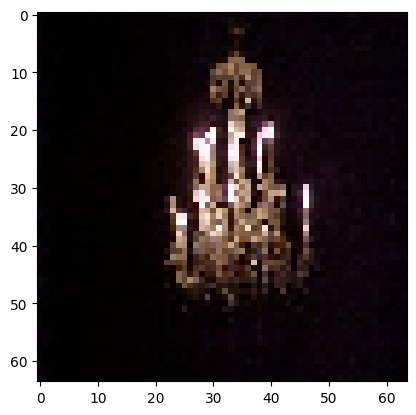

In [20]:
n = 88

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

In [ ]:
'''
Here is the line-by-line explanation and answers for potential viva questions based on the code you've provided.

### **Line-by-Line Code Explanation:**

#### **1. Dataset Preparation:**
```python
dataset_dir = "./caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale=1.0 / 255)
```
- **Explanation**: 
  - `dataset_dir`: Specifies the directory path where the dataset is located.
  - `ImageDataGenerator`: This class is used to augment and preprocess images for training. The `rescale=1.0 / 255` normalizes the pixel val
  ues of the images to a range between 0 and 1, which is a common practice for neural networks.
- **Significance for Viva**: It's important to normalize the image data to help the model converge faster during training and avoid issues related to large pixel values.

```python
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),  # Resize images to 64x64 pixels
    batch_size=batch_size,
    class_mode='categorical'  # One-hot encoding of labels
)
```
- **Explanation**: 
  - `batch_size`: Defines how many images will be processed in each batch during training.
  - `flow_from_directory`: This method loads images from the directory specified in `dataset_dir`. It resizes the images to 64x64 pixels, 
  and applies the preprocessing (rescaling) defined in the `ImageDataGenerator`. 
  The `class_mode='categorical'` indicates that the labels are encoded as one-hot vectors.
- **Significance for Viva**: This is used to load the dataset in a way that is suitable for training deep learning models. It ensures that images are resized and labels are encoded in the required format.

```python
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]
print(len(x_train))
print(len(x_test))
```
- **Explanation**: 
  - Retrieves the training and test batches (images and their corresponding labels) from the generator. `x_train` and `y_train` are the features (images) and labels for training, while `x_test` and `y_test` are used for testing.
  - Prints the lengths of `x_train` and `x_test`, which should show how many images are in each set.
- **Significance for Viva**: Ensures you understand the structure of the dataset and confirms that the images are being loaded correctly.

#### **2. Building the Model Using VGG16:**
```python
from tensorflow.keras.applications import VGG16
VGG16 is a deep convolutional neural network architecture developed by the Visual Geometry Group at the University of Oxford. 
It's widely used for image recognition tasks due to its powerful ability to classify images into various categories.

Here's an overview of VGG16:

Layers and Structure:

VGG16 is called "16" because it has 16 weighted layers, including 13 convolutional layers and 3 fully connected layers.
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
```
- **Explanation**: 
  - Loads the pre-trained VGG16 model without the top (fully connected) layers. The weights are loaded from a file, and the input shape is set to 64x64x3 for RGB images.
  - `include_top=False` ensures that the model will not use the original fully connected layers from VGG16, allowing us to add custom layers.
- **Significance for Viva**: This part demonstrates transfer learning, where a pre-trained model (VGG16) is used as the base for a new model. This saves time and computational resources.

```python
for layer in base_model.layers:
   layer.trainable = False
```
- **Explanation**: 
  - Freezes all layers of the base VGG16 model, preventing them from being updated during training.
- **Significance for Viva**: Freezing layers of a pre-trained model helps leverage the learned features (like edge detection, textures, etc.) without modifying them.

```python
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
```
- **Explanation**: 
  - The `Flatten` layer converts the output of the convolutional layers (a 3D tensor) into a 1D tensor, suitable for input to dense layers.
  - A `Dense` layer with 64 units and ReLU activation is added for further processing.
  - The final `Dense` layer outputs 102 units, corresponding to the number of classes in the dataset, with a softmax activation to produce probabilities for each class.
- **Significance for Viva**: `Flatten` is necessary for moving from the convolutional layers to the fully connected layers. `Softmax` is used for multi-class classification problems, where the model assigns a probability to each class.

```python
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))
```
- **Explanation**: 
  - The model is created using the base VGG16 model (with frozen layers) and the custom output layers.
  - The model is compiled using the Adam optimizer and categorical cross-entropy loss function (since it's a multi-class classification problem). It is trained for 10 epochs using the training data.
- **Significance for Viva**: This code demonstrates how to fine-tune a model by adding custom layers and training it on a specific task.

#### **3. Fine-Tuning the Model:**
```python
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers:
   layer.trainable = False
```
- **Explanation**: 
  - Re-loads the base model and freezes all layers again for fine-tuning.
- **Significance for Viva**: Fine-tuning is typically done after pre-training the model. By freezing the earlier layers, we avoid overfitting on smaller datasets and use the pre-trained knowledge effectively.

```python
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
```
- **Explanation**: 
  - Unfreezes the last two layers of the base VGG16 model to allow them to be trained (fine-tuned) on the new dataset.
- **Significance for Viva**: Fine-tuning the last layers allows the model to adapt the high-level features learned by VGG16 to the specific dataset.

```python
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)
```
- **Explanation**: 
  - Adds a `Flatten` layer, a `Dense` layer with 512 units, and a `Dropout` layer with a rate of 0.3 to prevent overfitting. Finally, a softmax output layer is used for classification.
- **Significance for Viva**: The `Dropout` layer reduces overfitting during training by randomly setting a fraction of input units to 0 at each update during training time.

```python
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))
```
- **Explanation**: 
  - The model is recompiled with a learning rate of 0.001 (which is often used for fine-tuning) and trained for 20 epochs.
- **Significance for Viva**: Fine-tuning with a smaller learning rate allows the model to adjust the learned weights without making drastic updates, which helps improve performance on the target task.

#### **4. Evaluating and Visualizing Results:**
```python
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())
n = 88
plt.imshow(x_test[n])
print("Predicted: ", labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])
```
- **Explanation**: 
  - Makes predictions on the test set and visualizes a sample image from `x_test`. It also compares the predicted and actual labels for that image.
- **Significance for Viva**: This step helps assess the model's performance and visualize the predictions, which is crucial for evaluating the effectiveness of the training process.

---

### **Potential Viva Questions & Answers:**

1. **What is the purpose of the `ImageDataGenerator` class?**
   - **Answer**: `ImageDataGenerator` is used for real-time data augmentation and preprocessing of images during training. 
   It resizes, rescales, and applies transformations to images, making the training process more efficient and helping the model generalize better.

2. **Why is VGG16 used as the base model?**
   - **Answer**: VGG16 is a pre-trained model that has learned features on a large dataset (ImageNet). It serves as a strong feature extractor, and by fine-tuning it, we can adapt it to the current dataset, saving time and computational resources.

3. **What does `include_top=False` mean in the VGG16 model?**
   - **Answer**: `include_top=False` means that the fully connected layers at the top of the VGG16 model (used for classification) are excluded. This allows us to add our own custom output layers for the specific task.

4. **What is the role of the `Flatten

` layer?**
   - **Answer**: The `Flatten` layer is used to convert the 3D output from the convolutional layers into a 1D tensor, which can then be passed to fully connected layers for classification.

5. **What is the significance of using `softmax` activation in the output layer?**
   - **Answer**: `Softmax` activation is used for multi-class classification problems. It converts the output values into probabilities, with the sum of probabilities across all classes equal to 1.

6. **Why do we freeze some layers during fine-tuning?**
   - **Answer**: Freezing layers prevents the weights of those layers from being updated during training. This allows us to retain the pre-learned features from the base model while only training the custom layers, which helps avoid overfitting and speeds up training.

7. **What is the role of the `Dropout` layer?**
   - **Answer**: The `Dropout` layer helps prevent overfitting by randomly setting a fraction of input units to 0 during training. This forces the model to not rely too heavily on any specific feature and generalize better.

8. **Why do we use `categorical_crossentropy` loss function?**
   - **Answer**: `categorical_crossentropy` is used for multi-class classification problems where each label is represented as a one-hot encoded vector. It measures the dissimilarity between the true and predicted labels.

9. **How does the `Adam` optimizer work?**
   - **Answer**: The `Adam` optimizer is an adaptive optimizer that computes individual learning rates for each parameter by considering both the first and second moments of the gradients. It’s efficient and works well in practice.

10. **What does the `predict` method do?**
    - **Answer**: The `predict` method generates class probabilities for the input data (in this case, the test images), which are used to determine the model’s predictions.


'''